In [98]:
# Importing libraries and dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [99]:
# File path for CSV
file_path = "./ai_job_market_insights.csv"

# Reading the data into a DataFrame 
job_market_data = pd.read_csv(file_path)
job_market_data


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable


In [100]:
# Creating job title value count 
job_title_counts = job_market_data['Job_Title'].value_counts()

job_title_counts


Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

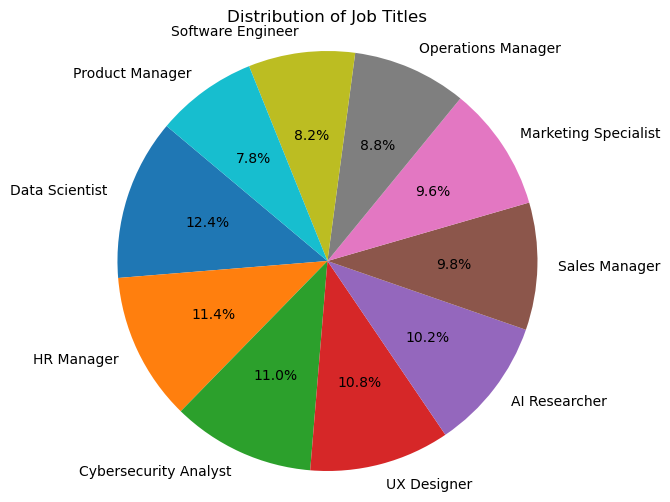

In [101]:
# Plotting the job titles in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Job Titles')
plt.axis('equal')
plt.show()

In [102]:
# Creating inudstry value count
industry = job_market_data["Industry"].value_counts()

industry

Industry
Manufacturing         58
Education             57
Technology            56
Finance               53
Telecommunications    53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

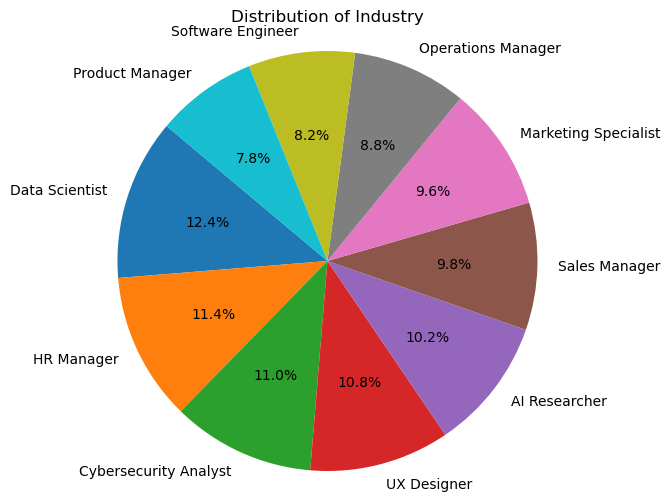

In [103]:
# Plotting the industries in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_title_counts, labels=job_title_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industry')
plt.axis('equal')
plt.show()

In [104]:
# Creating Company size value count
company_size = job_market_data["Company_Size"].value_counts()

company_size

Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

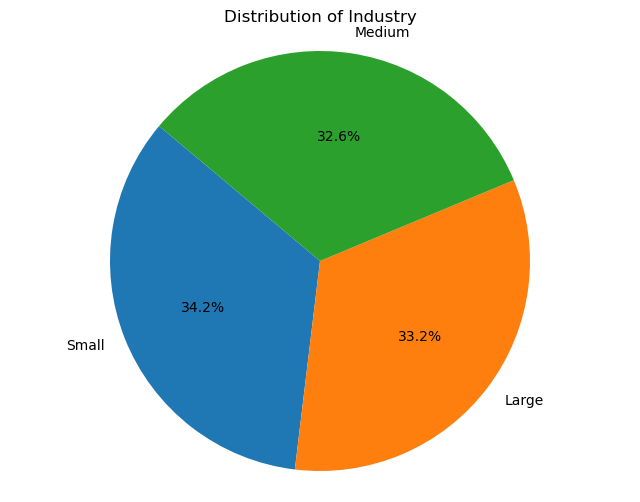

In [105]:
# Plotting the company size in a piechart
plt.figure(figsize=(8, 6))
plt.pie(company_size, labels=company_size.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Industry')
plt.axis('equal')
plt.show()

In [106]:
# Creating Job location value count
job_location_count = job_market_data["Location"].value_counts()
job_location_count

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

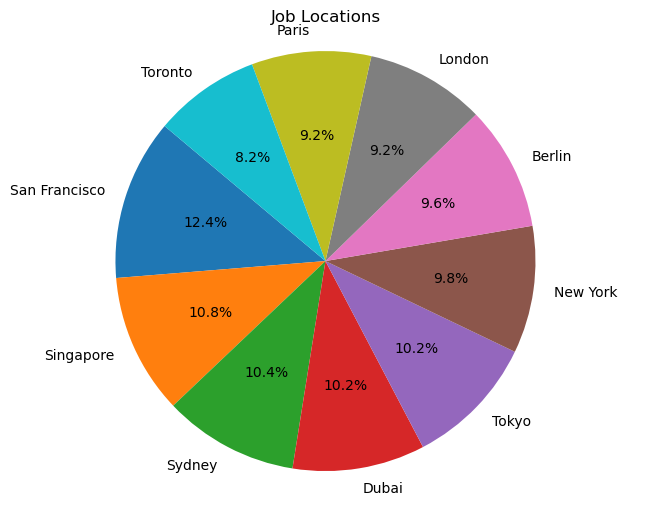

In [107]:
# Plotting the job titles in a piechart
plt.figure(figsize=(8, 6))
plt.pie(job_location_count, labels=job_location_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Locations')
plt.axis('equal')
plt.show()

In [108]:
# Creating Ai adoption value count
ai_adoption_level = job_market_data["AI_Adoption_Level"].value_counts()

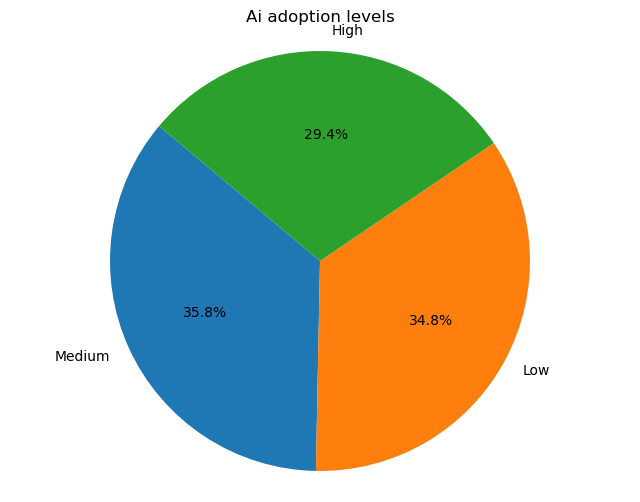

In [109]:
# Plotting the AI Adoption Levels in a piechart
plt.figure(figsize=(8, 6))
plt.pie(ai_adoption_level, labels=ai_adoption_level.index, autopct='%1.1f%%', startangle=140)
plt.title('Ai adoption levels')
plt.axis('equal')
plt.show()

In [110]:
# Creating automation risk value count 
automation_risk = job_market_data["Automation_Risk"].value_counts()

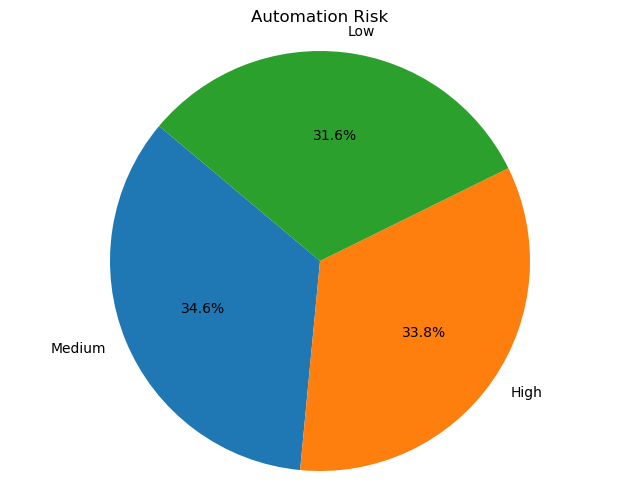

In [111]:
# Plotting the Automation risk in a piechart
plt.figure(figsize=(8, 6))
plt.pie(automation_risk, labels=automation_risk.index, autopct='%1.1f%%', startangle=140)
plt.title('Automation Risk')
plt.axis('equal')
plt.show()

In [112]:
# Creating required skills value count
required_skills = job_market_data["Required_Skills"].value_counts()

required_skills

Required_Skills
Project Management    60
Python                60
Cybersecurity         58
Machine Learning      52
UX/UI Design          49
Sales                 49
Data Analysis         49
Marketing             45
JavaScript            44
Communication         34
Name: count, dtype: int64

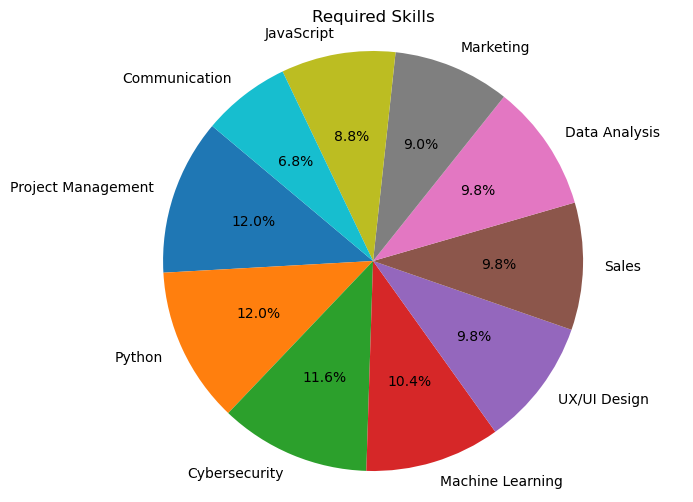

In [113]:
# Plotting the required skills in a piechart
plt.figure(figsize=(8, 6))
plt.pie(required_skills, labels=required_skills.index, autopct='%1.1f%%', startangle=140)
plt.title('Required Skills')
plt.axis('equal')
plt.show()

In [114]:
# Using pd.quantile to break salary into five different buckets 
salary_column = job_market_data["Salary_USD"]

# This sets up the five different buckets 
quintiles = salary_column.quantile([0, 0.2, 0.4, 0.6, 0.8, 1])

# Using pd.cut() to assign each salary to one of the five buckets
job_market_data['Salary_Bucket'] = pd.cut(salary_column, bins=quintiles, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'], include_lowest=True)

# Display the first few rows with the new bucket column
job_market_data[['Salary_USD', 'Salary_Bucket']].head()

,Salary_USD,Salary_Bucket
0,111392.165243,Very High
1,93792.562466,Medium
2,107170.263069,Very High
3,93027.953758,Medium
4,87752.922171,Medium


In [115]:
# Creating a value counts for bucket 
bucket_counts = job_market_data['Salary_Bucket'].value_counts().sort_index()

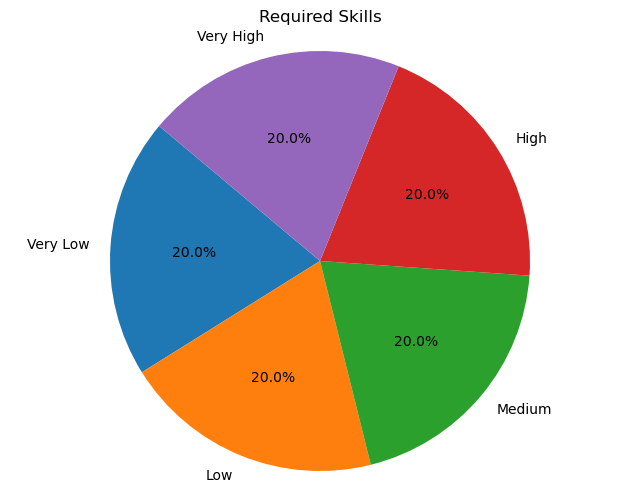

In [116]:
# Plotting the required skills in a piechart
plt.figure(figsize=(8, 6))
plt.pie(bucket_counts, labels=bucket_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Required Skills')
plt.axis('equal')
plt.show()

In [117]:
#Creating a linear regression model 

In [127]:
# Making Automation_Risk into numeric values (Low = 0, Medium = 1, High = 2)
job_market_data['Automation_Risk_Encoded'] = job_market_data['Automation_Risk'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Selecting features
features = job_market_data[['Job_Title', 'Industry', 'Company_Size', 'AI_Adoption_Level', 'Required_Skills', 'Salary_USD', 'Remote_Friendly', 'Job_Growth_Projection']]

# One-hot encoding categorical variables
features_encoded = pd.get_dummies(features, drop_first=True)

# Target variable (encoded automation risk)
target = job_market_data['Automation_Risk_Encoded']

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.3, random_state=42)

# Proceed to build the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)

# Saving training and testing data to CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv('./training_data.csv', index=False)
test_data.to_csv('./testing_data.csv', index=False)


In [129]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating the R-squared value
r2 = r2_score(y_test, y_pred)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Printing the results
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

R-squared: 0.010961585025571763
Mean Squared Error: 0.6648536011772544
